# COGS 118B - Final Project

# Clustering Stocks

## Group members

- Aditya Agrawal
- Samil Ahsan
- Junghwan Kim
- Jensen McKenzie
- Abishek Siva

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

---
(old)
In this study, our objective is to categorize stocks based on their quantified return and volatility. By employing clustering techniques, we aim to investigate whether return and volatility serve as accurate indicators for grouping stocks in a meaningful manner. To achieve this, we utilize extensive datasets obtained from yfinance and Morningstar, encompassing a vast array of ticker symbols for each stock. Employing variables such as price, volume, and performance metrics, we normalize the data and apply machine learning methodologies, including K-means clustering and hierarchical clustering.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

---
(old)

The financial markets are complex ecosystems influenced by a myriad of factors, including economic indicators, geopolitical events, investor sentiment, and company-specific information. Analyzing and understanding the intricate relationships within this dynamic environment is crucial for making informed investment decisions. Traditional approaches to stock analysis often fall short in capturing the nuanced patterns and interactions that drive market movements.

In recent years, machine learning and data science techniques have gained prominence in financial analysis, offering a more sophisticated and data-driven perspective. One such powerful technique is stock clustering, a method that groups similar stocks based on historical price movements, trading volumes, and other relevant features. The underlying assumption is that stocks with similar characteristics are likely to respond similarly to market dynamics.

There has been a lot of relevant work conducted regarding this topic, with interesting results. In a study done in Argentinia about using clusetring technquies to enhance stock returns forecasting, they used K-means and for each cluster, used ARIMA (Autoregressive Integrated Moving Average) and LSTM (Long Short-Term Memory) forecasting models and test their performances. The study showed that there was enhanced forecasting precision by leveraging the additional information offered by clustering methods, underscoring the significance of relevant data selection in preprocessing. Moreover, using the whole sample of stocks only worsened the forecasting ability of LSTM model<a name="fn1"></a>[<sup>[1]</sup>](#fn1note).

In another paper, the researchers used clustering-enhanced deep learning framework to predict the stock prices using LSTM, RNN (Recurrent Neural Network), and GRU (Gated Recurrent Unit) models. To enhance clustering effectiveness in the context of stock price time series, this study introduces a novel similarity measure known as Logistic Weighted Dynamic Time Warping (LWDTW) for calculating distances between stock price data points. In comparison with benchmark measures, such as Euclidean distance and standard Dynamic Time Warping (DTW), LWDTW incorporates a weight function that acknowledges the non-normal distribution of stock returns. Empirical analysis of individual US stock price data reveals characteristics like dynamic, non-stationary, nonlinear, and chaotic behaviors, better represented by a logistic distribution probability density function with higher peaks and fatter tails. LWDTW leverages this insight by using the logistic distribution as the weight function, assigning appropriate weights to extreme return observations while emphasizing normal return observations in distance matrix calculations. This approach ensures that the clustering method accounts for the unique patterns in stock returns<a name="fn2"></a>[<sup>[2]</sup>](#fn2note).

Although a lot of researches focus on predicitng the stock prices like above, they all gave very helpful insights on how to effectively utilize clustering methods for much accurate prediciting and forecasting aftwerwards. Both studies mentioned above displayed the importance of proper clustering methods, giving us tips and even prompted to create a new clustering methods. Overall, understandings of these studies could gave us better idea of clustering and make us more aware of things to consider when implementing clustering on stocks and utilize their knowledge into our own project. 

<sup id="fn1">1. [Javier Vásquez Sáenz, Facundo Manuel Quiroga, Aurelio F. Bariviera,Data vs. information: Using clustering techniques to enhance stock returns forecasting, International Review of Financial Analysis, Volume 88, 2023, 102657, ISSN 1057-5219, https://doi.org/10.1016/j.irfa.2023.102657.]<a href="#ref1" title="Jump back to footnote 1 in the text.">↩</a></sup>

<sup id="fn2">2. [Li, M., Zhu, Y., Shen, Y. et al. Clustering-enhanced stock price prediction using deep learning. World Wide Web 26, 207–232 (2023). https://doi.org/10.1007/s11280-021-01003-0]<a href="#ref2" title="Jump back to footnote 2 in the text.">↩</a></sup>

---
# Problem Statement
The problem we are aiming to solve involves creating a machine learning model that can automate the clustering of stocks based on certain factors such as current price, market cap, volatility, P/E ratio, and dividend yield. This involves two very broad steps:

1. Quantify these variables of our targeted stock data observations over a certain period of time.

2. Cluster stocks into distinct groups with very similar market tendencies or behaviors using these quantified variables.

### ML-Relevant Potential Solution
As a result of looking into the clustering of different stocks, this project naturally has machine learning relevant solutions that involve clustering techniques such as K-means or GMM. Using clustering techniques also lends itself to expanding with more machine learning methods, including but not limited to PCA in order to reduce dimensionality or outlier removal. Feeding the model historical data about the stocks' properties should allow it to learn to identify patterns and group stocks with similar characteristics. This automated clustering can help investors make more informed decisions identifying groups of stocks that align more with their investment goals.

### Quantifiability
The variables will already be quantified in the dataset we have selected. Due to the nature of the variables we are measuring, this project is highly quantifiable as we are using historical stock price data and performing mathematical compuations such as normalization or outlier removal on the data.

### Measurability and Observability
We will ensure measurability by using the variety of measured ticker symbols present in finance and stock datasets that contain significant amounts of historical data leading up to current times. Not only do we aim to have variables that are easily measured and observed, but we also strive to measure the success of the machine learning model and its ability to accurately cluster stocks in a meaningful way. We can use certain metrics such as the Davies-Bouldin index to evaluate the quality of clusters by measuring similarity of stocks to other stocks in the same cluster. Another metric we can look into is the silhouette score as a way of evaluating the clustering.

### Replicability
Clustering stocks based on these selected metrics that are contained in most financial datasets will guarantee replicability in the sense that the model can be used across a multitude of time periods. Using a machine learning model trained on historical data will allow us to continuously feed data as it arrives over time to create clusters that represent the latest market trends. This ensures that the clustering will remain relevant and can still be used to inform investment decisions.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


- [Dataset 1](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks): This dataset contains the stock prices of the S&P 500 companies. The dataset contains 5 columns and 6068010 rows. The columns are: `date`, `name`, `open`, `high`, `low`, `close`, `volume`. The `date` column is a string that represents the date of the stock price. The `name` column is a string that represents the name of the company. The `open`, `high`, `low`, `close`, and `volume` columns are floats that represent the stock price of the company. The dataset was cleaned by removing any rows with missing values.
- [Dataset 2](https://pypi.org/project/yfinance/): This is a Python library that allows us to download the stock prices of companies. The library was used to download various other metrics of the S&P 500 companies. The library contains a (usually numerical) value for each metric, with hundreds of metrics for each company

In [1]:
%pip install yfinance
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist

In [2]:
try: 
    df_non_normalized = pd.read_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv')
except: 
    sp500_companies = pd.read_csv('sp500_companies.csv')

    symbols = []
    sectors = []
    current_prices = []
    market_caps = []
    volatilities = []
    pe_ratios = []
    dividend_yields = []

    for index, row in sp500_companies.iterrows():
        try:
            symbol = row['Symbol']
            company_data = yf.Ticker(symbol)
            info = company_data.info
            symbols.append(symbol)
            sectors.append(company_data.info['sector'])
            current_prices.append(row['Currentprice'])
            market_caps.append(row['Marketcap'])
            volatilities.append(company_data.history(period="1y").Close.pct_change().std())
            pe_ratios.append(info.get('forwardPE', None))
            dividend_yields.append(info.get('dividendYield', None))
        except:
            print(f"Data for {symbol} not found.")

    data = {
        'Symbol': symbols,
        'Sectors': sectors,
        'Current Price': current_prices,
        'Market Cap': market_caps,
        'Volatility': volatilities,
        'P/E Ratio': pe_ratios,
        'Dividend Yield': dividend_yields
    }
    df_non_normalized = pd.DataFrame(data)

    df_non_normalized.to_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv', index=False)

(df_non_normalized)

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,402.65,2991866511360,0.014303,33.205746,0.0074
1,AAPL,Technology,170.12,2626975956992,0.011977,24.127794,0.0056
2,NVDA,Technology,859.64,2149100027904,0.029599,31.569439,0.0002
3,AMZN,Consumer Cyclical,174.12,1808654008320,0.019159,33.193268,NaN
4,GOOG,Communication Services,133.78,1657520783360,0.017622,19.538517,NaN
...,...,...,...,...,...,...,...
497,CMA,Financial Services,51.74,6824402944,0.033912,8.528363,0.0539
498,GNRC,Industrials,110.09,6635046912,0.032436,14.605000,NaN
499,VFC,Consumer Cyclical,15.82,6151069184,0.035632,11.853309,0.0224
500,ZION,Financial Services,40.95,6066947584,0.036654,9.015087,0.0388


## Data Preprocessing 

### Normalization

In our coding project, the data preprocessing stage emphasizes normalization as a fundamental step to optimize the dataset for subsequent analyses, including clustering, dimensionality reduction and exploratory data analysis (EDA). Normalization ensures that all features are on a standardized scale, which is crucial for machine learning practices such as Gaussian Mixture Modeling (GMM)and Principal Component Analysis (PCA). Without normalization, any analysis will not produce an optimal insight to our data.

Normalization ensures that all features are on a similar scale, which is essential for GMM to accurately capture the underlying structure of the data. By standardizing the scale of the features, normalization ensures that each feature contributes equally to the model's learning process, preventing any single feature from exerting undue influence. 

For PCA, features with larger scales could unduly influence the principal components, potentially skewing the analysis. Normalization ensures that variables are on a comparable scale, thus enabling PCA to effectively identify the directions of maximum variance in the dataset. 

Additionally, normalization enhances the effectiveness of EDA and data visualization by facilitating fair comparisons between features, aiding in the identification of patterns and relationships within the data. By standardizing the scale, visualization techniques like box plots and violin plots provide clearer insights into the distribution and correlations among variables, ultimately fostering a deeper understanding of the dataset's underlying structure. 

Overall, normalization serves as a vital preparatory step, enabling more accurate and insightful analyses in our attempt to discover underlying knowledge of stock's return and volitatilty.

In [3]:
def normalize_data(df, numerical_columns):
    """
    Normalize specified numerical columns in a DataFrame using Min-Max scaling.

    Parameters:
    - df: DataFrame, the input DataFrame.
    - numerical_columns: list, names of numerical columns to normalize.

    Returns:
    - df_normalized: DataFrame, the normalized DataFrame.
    """
    df_normalized = df.copy()
    scaler = MinMaxScaler()
    df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

    return df_normalized

try: 
    df_normalized = pd.read_csv('sp500_stock_data_cleaned_normalized.csv')
    features = ['Current Price', 'Market Cap', 'Volatility', 'P/E Ratio', 'Dividend Yield']
    df_normalized_numeric = df_normalized[features]
except:
    df = pd.read_csv('sp500_stock_data_with_metrics_NOT_ONE_HOT.csv')
    df = df.drop_duplicates()  # Remove duplicate rows
    df = df.dropna()  # Remove rows with missing values

    numerical_columns = ['Current Price', 'Market Cap', 'Volatility', 'P/E Ratio', 'Dividend Yield']

    df_normalized = normalize_data(df, numerical_columns)

    df_normalized.to_csv('sp500_stock_data_cleaned_normalized.csv', index=False)
    df_normalized_numeric = df_normalized[numerical_columns]

(df_normalized)

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
0,MSFT,Technology,0.115016,1.000000,0.217684,0.548600,0.078075
1,AAPL,Technology,0.047047,0.877809,0.136364,0.499054,0.058824
2,NVDA,Technology,0.248597,0.717783,0.752602,0.539670,0.001070
3,META,Communication Services,0.140613,0.416624,0.541015,0.493398,0.041711
4,LLY,Healthcare,0.224613,0.245528,0.366207,0.618555,0.071658
...,...,...,...,...,...,...,...
400,HAS,Consumer Cyclical,0.012148,0.000470,0.455133,0.441071,0.577540
401,CMA,Financial Services,0.012443,0.000398,0.903397,0.413915,0.575401
402,VFC,Consumer Cyclical,0.001944,0.000173,0.963562,0.432062,0.238503
403,ZION,Financial Services,0.009289,0.000145,0.999295,0.416572,0.413904


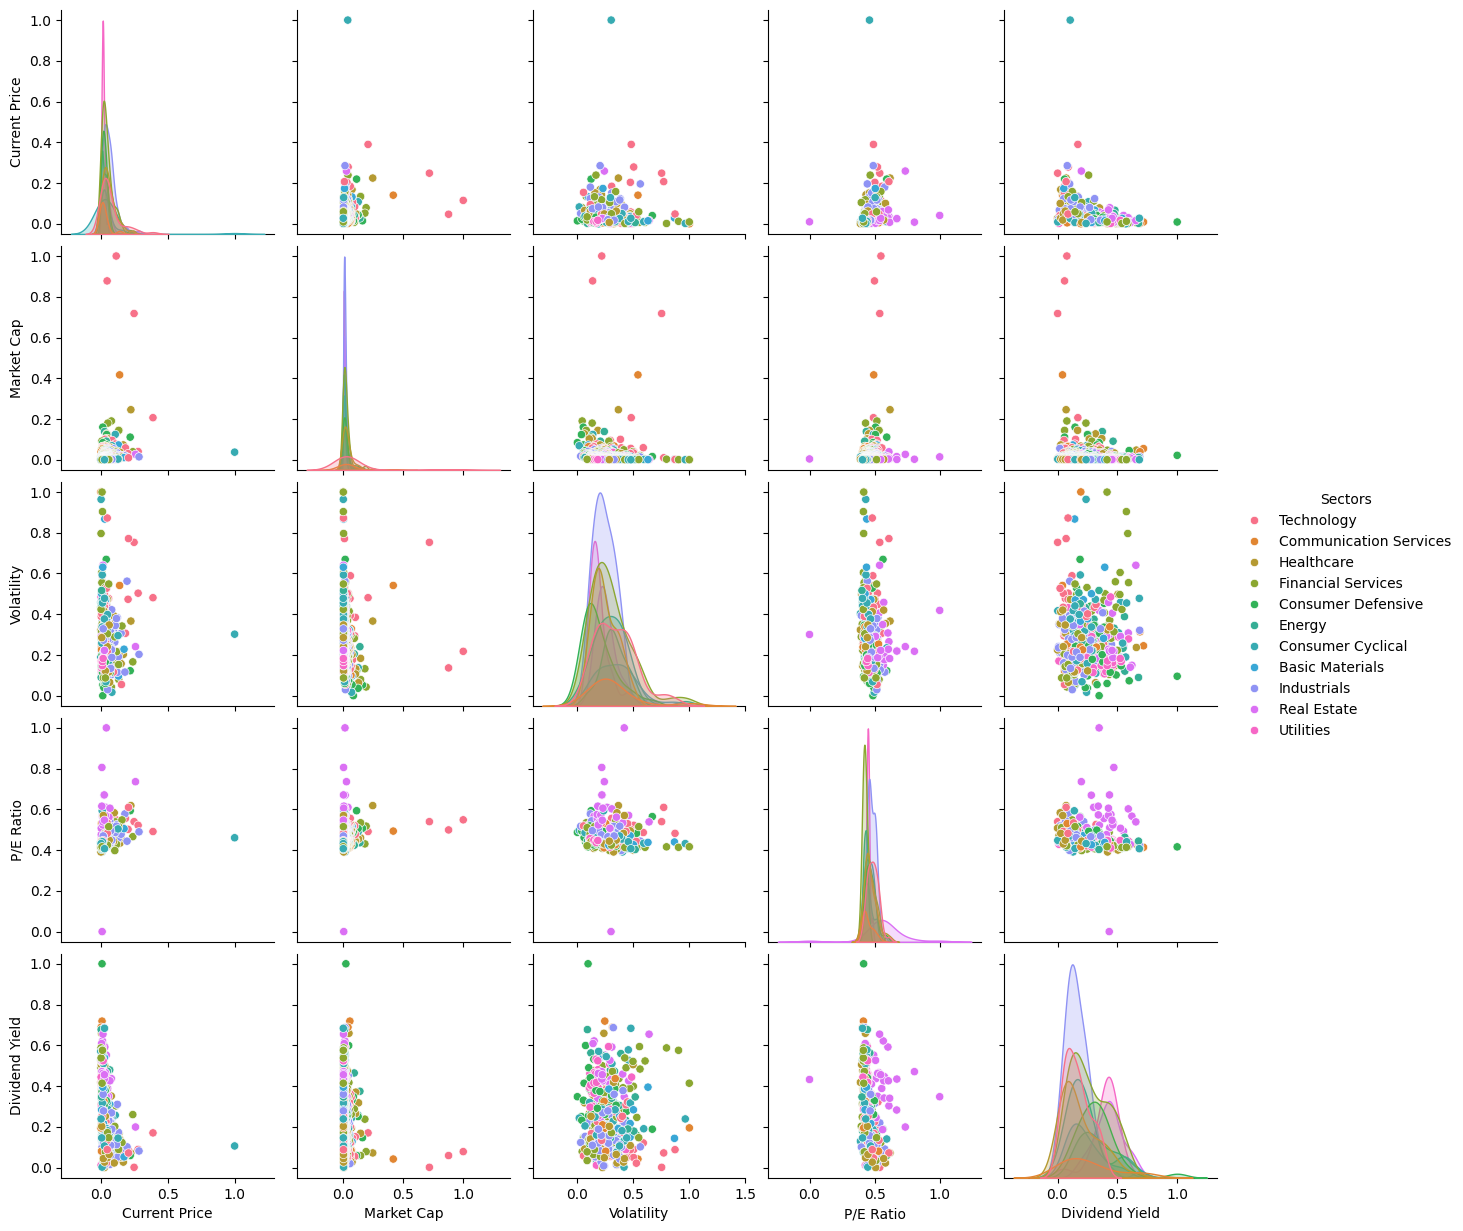

In [5]:
sns.pairplot(df_normalized,hue='Sectors')

Given that pairplots display a matrix of scatter plots, we can see the distributions of single variables as well as their relationships with other variables in the S&P 500 dataset. Each scatter plot on the diagonal displays the distribution of a single variable as a plot similar to a histogram where we can see the distributions of each sector for that single variable. On the other hand, the lower and upper triangles of the pairplot show the relationship between the two corresponding variables.

There are a lot of interesting relationships to be discussed, but here are summaries of the more notable ones:

- **Volatility**: The distribution of volatility appears to be relatively spread out throughout each sector with exceptions such as Technology and Healthcare, which may have a wider range of volatility due to these sectors likely being more sensitive to market conditions.
- **Current Price and Dividend Yield**: The scatter plots and densities suggest that there may be a negative relationship between current price and dividend yield in the sense that current prices tend to increase slightly as dividend yield decreases.
- **Sector Relationships**: Looking at the diagonal of this pairplot, it is apparent that the sectors have their own cluster tendencies in some of the metrics. For instance, the Technology sector may cluster on the higher end of certain variables such as market cap or volatility since the plot shows that it peaks significantly higher than some of the other sectors.

While the pairplot is useful in identifying potential initial patterns between the different stock variables, further statistical analysis is needed for establishing a true correlation between these variables. For this reason, we will conduct several different types of analysis on this data in order to search for any statistically significant relationship.

## Exploratory Data Analysis

Although EDA is not a machine learning technique, it serves as a crucial precurosr to machine learning analysis. It provides valuable insights to dataset's characteristics. By visualizing the data, EDA aids in identifying relationship between the variables and distirbution of the data points, which will be valuable when performing PCA. By performing EDA, we can ensure that our machine learning application will be adequite. 

### Correlation Map

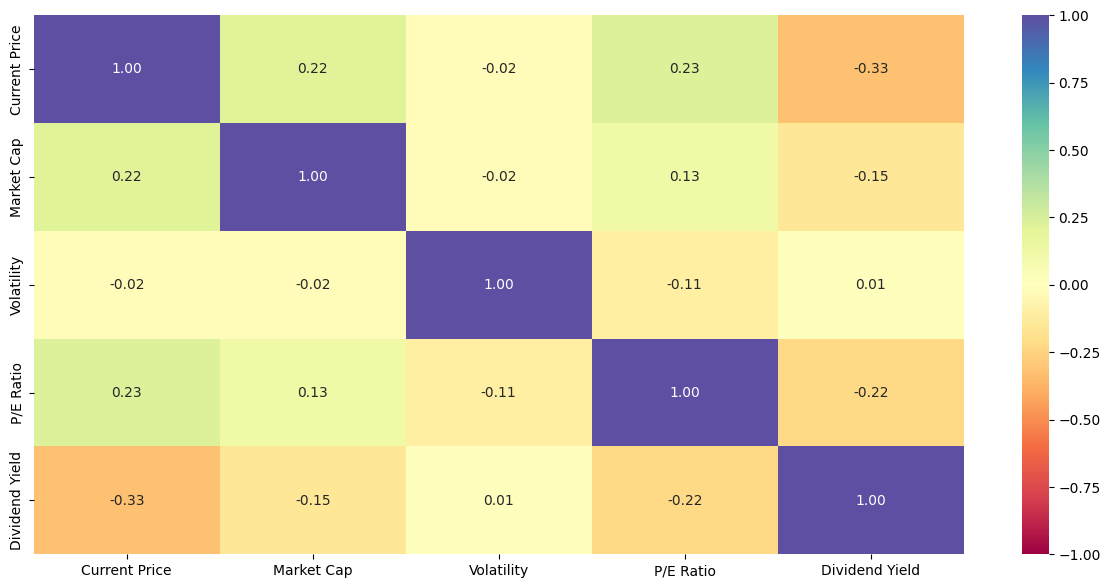

In [6]:
# checking for correlations
# Important: Since normalization is a linear transformation, it doesn't affect correlation of the features, hence no need to run correlation map with normalized data 
num_cols = df_normalized.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_normalized[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

This correlation heatmap provides both visuals and quantitative measurements as to the direction and magnitude of any linear relationships between these financial metrics. Again, below is a summary of the more notable measurements:

- **Current Price and Market Cap**: Looking at the cross section of current price and market cap, we can see that there is a positive but weak linear relationship between the two, suggesting that higher market cap slightly correlates with a higher current price of the stock. While further analysis may show that this relationship is strong, the heatmap by itself is not enough to indicate that market cap itself is a strong predictor of stock prices.
- **Current Price and Dividend Yield**: The heatmap shows that there may be a negative correlation between current price and dividend yield, indicating that higher priced stocks may lead to lower dividend yields. Although this may be the strongest correlated pair according to the heatmap, it is important to note that this plot is not enough to establish that there is in fact a correlation.

These correlations and relationships may indicate that there are some interdependencies between the selected financial metrics, however, there is a plethora of other external factors that could contribute to the formation of distinct clusters of stocks in later analysis. Understanding these relationships will be crucial in interpreting the results of clustering algorithms.

### Violin Plots: Normalized vs. Non-Normalized

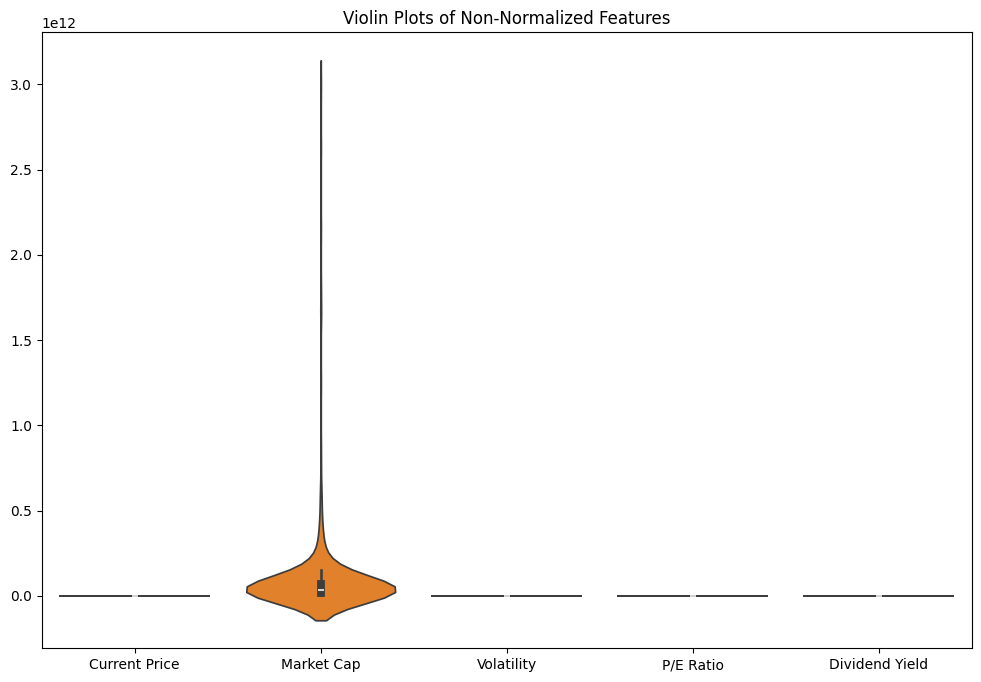

In [7]:
#Violin plot of anot normalized data 
plt.figure(figsize=(12, 8))
sns.violinplot(data = df_non_normalized , orient='v')
plt.title('Violin Plots of Non-Normalized Features')
plt.show()

Given these violin plots of the non normalized data, it is very hard to see any sort of patterns within the variables if they exist. Therefore, it'll prove useful to look at this plot on the normalized data instead.

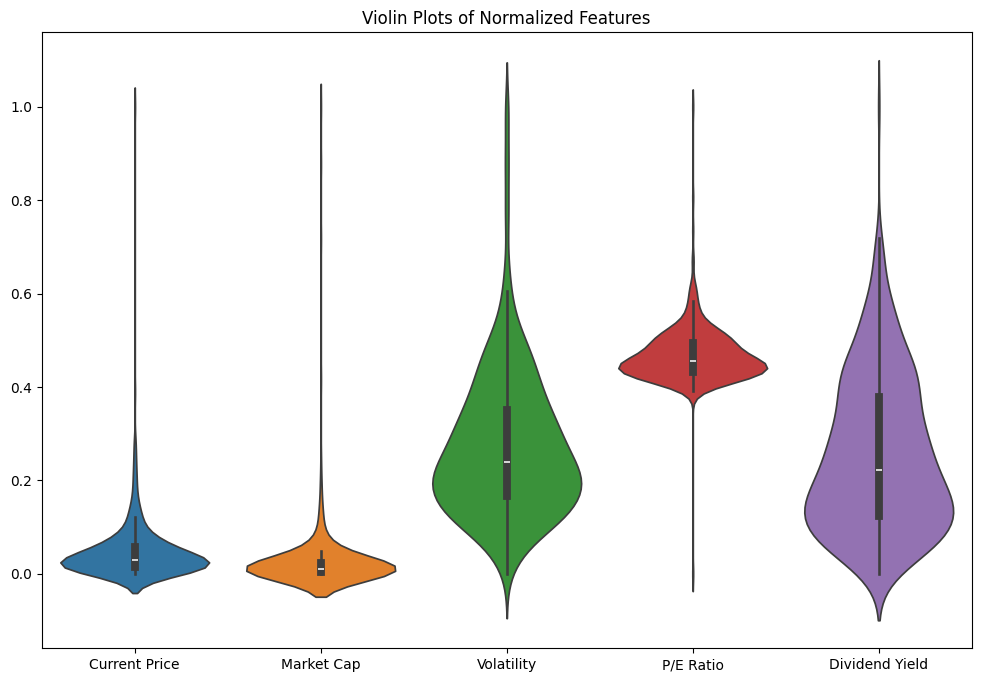

In [8]:
#Violin plot of normalized data 
plt.figure(figsize=(12, 8))
sns.violinplot(data = df_normalized , orient='v')
plt.title('Violin Plots of Normalized Features')
plt.show()

- **Current Price and Market Cap**: Both of these distributions have tight IQRs with a large amount of outliers, which is relatively expected as both stock prices and market caps for companies will clump around the same areas with a decent amount of companies having much higher measures for both.
- **Volatility**: The violin plot for volatility shows a much more spread out distribution in comparison to the previous two variables, which coincides with the patterns we saw in both the pairplot and the correlation heatmap. Outliers are still present, indicating that there are companies in this dataset with much more dynamic stocks.
- **P/E Ratio**: Similarly to the current price and market cap box plots, P/E ratio has a small IQR. However, this one is located towards the middle of the graph rather than the bottom, suggesting that most companies have a fair P/E ratio. It is interesting to note that many companies have a higher P/E ratio, suggesting that there are many companies in this dataset that overvalue their stock prices.
- **Dividend Yield**: This violin plot has the widest IQR with only one outlier, suggesting that there is significant variability in the dividend payout rates of companies within S&P 500.

## Dimensionality Reduction: Principal Component Analysis

We can use the elbow method to determine the optimal number of Principal Components

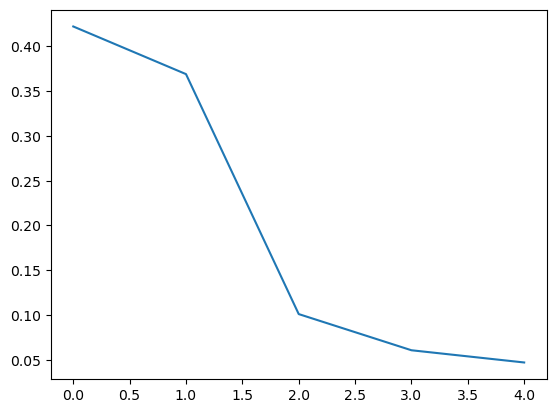

In [4]:
pca = PCA()
principal_components = pca.fit_transform(df_normalized_numeric)

plt.plot(pca.explained_variance_ratio_)

This graph suggests that 2 is the appropriate value for the principal components in PCA.

In [5]:
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_normalized_numeric)

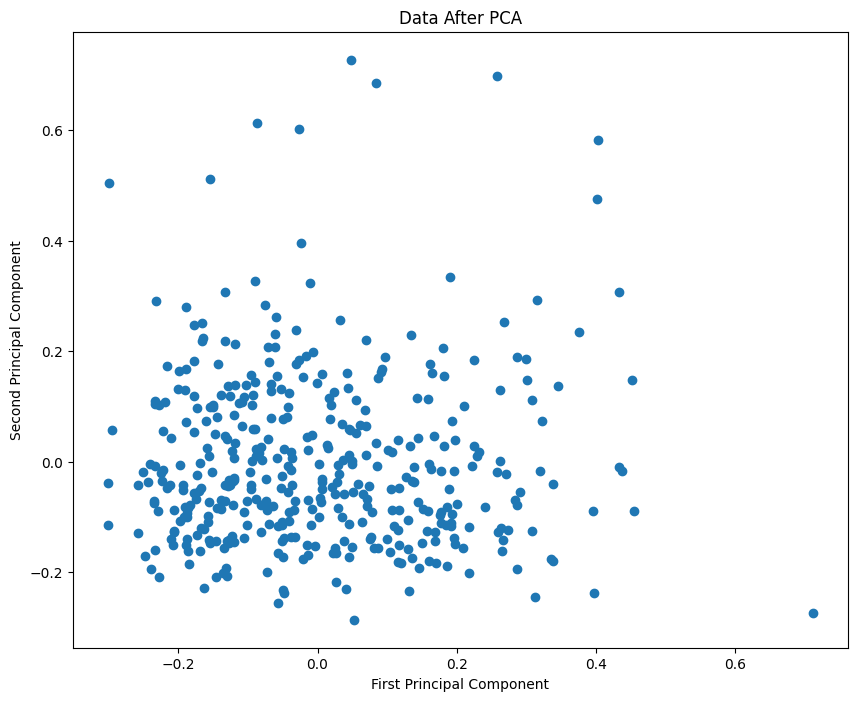

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1])
plt.title('Data After PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

With this plot, we can see the financial metrics of the S&P 500 dataset in a reduced two dimensional space. The data seem to be more evenly spread out across the first principal component, suggesting that this component accounts for the most variance compared to the other component. However, the second principal component still captures a significant portion of the variance. 

It is clear that many stocks in this dataset share similar characteristics in this two dimensional space, which is conveyed by the clustering of data occuring in the lower ends of both the first and second principal components. Despite this general cluster, there are points that lie outside, indicating that there are stock outliers with vastly different characteristics compared to that of the more general stocks in the middle. This coincides with the patterns seen in the violin plots.

Clustering algorithms such as K-means or GMMs when applied to this dimension reduced data can potentially reveal more distinct groups of stocks, which is ultimately what we hope to accomplish.

# Clustering and Performance Measures

We will compare the clustering performance of K-means and GMMs on the S&P 500 dataset. Below, we will discuss the performance of both clustering algorithms and compare the results.

## Performance Measures

1. Explained variance ratio: This measures the proportion of the dataset's variance that lies along the axis of each principal component. It is a measure of how much information (variance) can be attributed to each principal component.

2. Silhouette score: This measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

3. BIC: The Bayesian Information Criterion (BIC) is a criterion for model selection among a finite set of models. The model with the lowest BIC is preferred.

4. AIC: The Akaike Information Criterion (AIC) is a measure of the relative quality of a statistical model for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

### BIC vs. AIC

Although BIC and AIC are both very similar to each other, there are critical differences that accounts for the contrast in the suggestion of number of clusters. The BIC is more suited for the inference of the model selection as it is allows consistent estimation of the underlying data generating process, while the AIC is more suited for the prediction of model selection as it is asymptotically equivalent to cross-validation. Mathematically, they differ in scale of penalty for the number of parametes. 

$$ \text{AIC} = 2k - 2\ln(\hat{L}) $$
$$ \text{BIC} = k\ln(n) - 2\ln(\hat{L})$$

As the equations above suggest, the BIC penalizes the model complexity more heavily. Due to this nature, the BIC is more vulnerable to underfitting, whereas, the AIC is more vulnerable to overfitting. 

## K-Means Clustering

In order to perform the K-Means clustering algorithm on the data, we must first look into determining the optimal number of clusters for the data. We will try to do so using the elbow method, which looks for a sharp change in slope in a plot with k against either inertia or distortion.

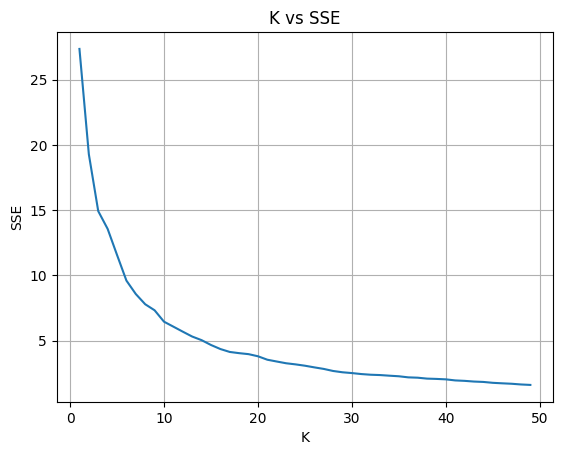

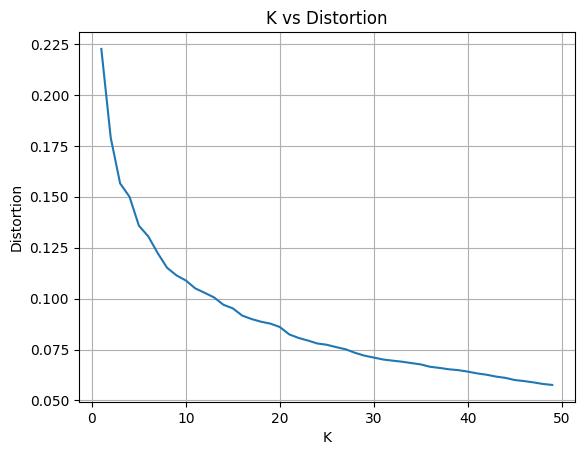

In [12]:
sse = {}
distortions = {}
for k in range(1, 50):
    kmeans = KMeans(n_clusters = k, random_state = 99).fit(df_normalized_numeric)
    sse[k] = kmeans.inertia_
    distortions[k] = sum(np.min(cdist(df_normalized_numeric, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_normalized_numeric.shape[0]

plt.plot(list(sse.keys()), list(sse.values()))
plt.title('K vs SSE')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid()
plt.show()

plt.plot(list(distortions.keys()), list(distortions.values()))
plt.title('K vs Distortion')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid()
plt.show()

Given the plots of K against both SSE and Distortion for K-Means, it is somewhat difficult to utilize the elbow method to determine the best value for k. Therefore, we must look into a promising range of values for k based on these plots and compare the respective models' silhouette scores instead.

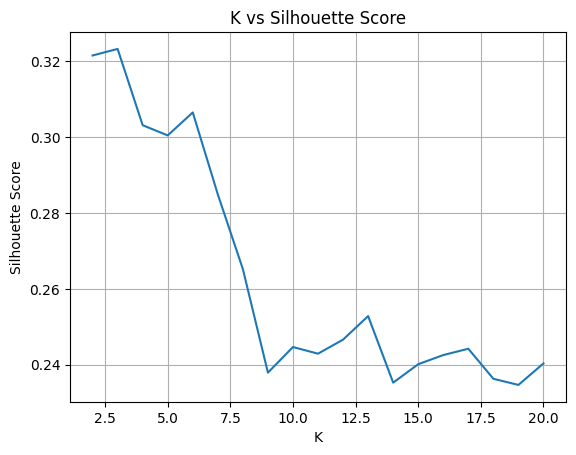

Optimal K Value: 3
Largest Silhouette Score: 0.3232695009851126


In [13]:
silhouette_scores = []
K = range(2, 21)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=99)
    kmeans.fit(df_normalized_numeric)
    silhouette_scores.append(silhouette_score(df_normalized_numeric, kmeans.labels_))

plt.plot(K, silhouette_scores)
plt.title('K vs Silhouette Score')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

optimal_silhouette = max(silhouette_scores)
optimal_k = K[silhouette_scores.index(optimal_silhouette)]
print('Optimal K Value: ' + str(optimal_k))
print('Largest Silhouette Score: ' + str(optimal_silhouette))

We can see that although the graph is somewhat messy, it suggests 3 as the optimal number of clusters for the K-Means algorithm. This is because the silhouette score is highest at 3, which suggests that the data points are more similar to their own clusters than to other clusters.

However, notice that even though 3 has the highest score, 0.32 is a relatively low score. This suggests that the clusters are not very dense and are rather spread out. This is likely due to the fact that the data is not very well suited for K-Means clustering, as the clusters are not very spherical and the algorithm is not very good at handling clusters of different sizes. The next part will show that GMMs are better suited for this dataset.

## Gaussian Mixture Model Clustering 

After our PCA, now we will cluster the datapoints using the reduced demensionality. By subsequently applying GMM to the PCA-transformed data, we gain a nuanced understanding of the underlying data distribution through the modeling of multiple Gaussian components. This facilitates improved interpretability and reveals latent patterns within the data, which may not be apparent in the original high-dimensional space. Furthermore, the soft clustering property of GMM allows for flexible clustering and classification, accommodating instances where cluster boundaries are ambiguous. Furthermore, in order to evalute the number of clusters to form, we look into the Bayesian Information Critetion (BIC), as well as Akaike Information Criterion (AIC). 

### Bayesian Information Criterion (BIC)

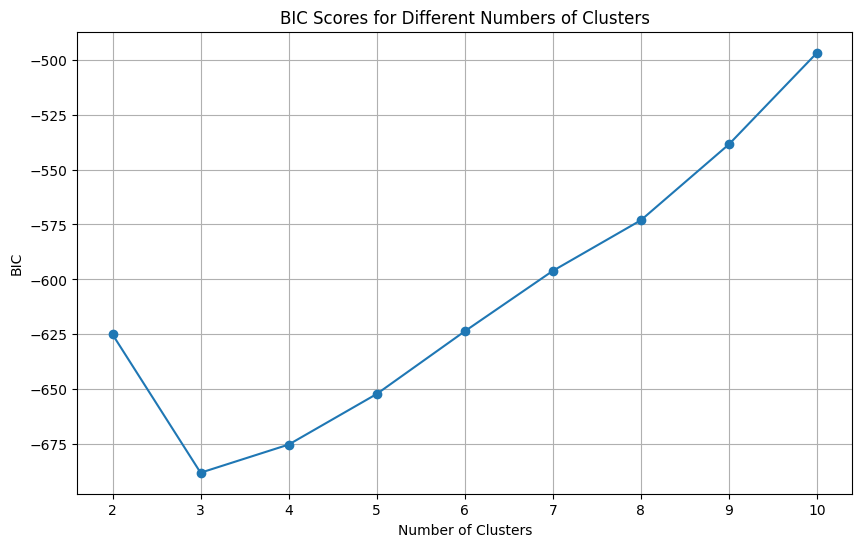

In [14]:
def calculate_bic(data, max_clusters):
    bic_scores = []
    for n in range(2, max_clusters+1):
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(data)
        bic_scores.append(gmm.bic(data))
    return bic_scores

max_clusters = 10  # You can adjust this
bic_scores = calculate_bic(df_reduced, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), bic_scores, marker='o', linestyle='-')
plt.title('BIC Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.grid(True)
plt.show()

The plotting of BIC scores suggests that we should cluster the data into 3 components. Now, let's see if the AIC scores reflect the same as BIC.

### Akaike Information Criterion (AIC)

Similar to the BIC process above, we will plot the AIC scores for each number of clusters, and evaluate which is the most appropriate. 

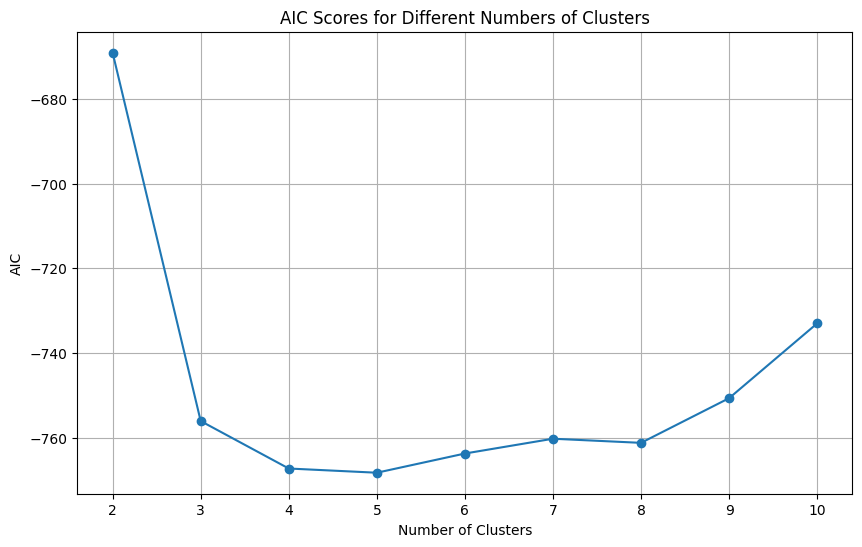

In [15]:
def calculate_aic(data, max_clusters):
    aic_scores = []
    for n in range(2, max_clusters+1):
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(data)
        aic_scores.append(gmm.aic(data))
    return aic_scores

max_clusters = 10  
aic_scores = calculate_aic(df_reduced, max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), aic_scores, marker='o', linestyle='-')
plt.title('AIC Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')
plt.grid(True)
plt.show()

The Plotting of AIC scores suggest that we use 4 clusters, unlike the BIC. 

## Choosing a clustering method

We can see that overall, the Gaussian Mixture Model clustering method is more appropriate for our dataset. This is because the BIC and AIC scores for GMM are lower than that of K-means, suggesting that GMM is a better fit for our data. Additionally, we can see it is much easier to determine the optimal number of clusters for GMM than it is for K-means. This could imply the difference between different number of clusters in K-means is not as significant.

## Applying Gaussian Mixture Model Clustering

Now, let's move on to actual GMM clustering. Below is a function that performs GMM clustering based on the data it has been given and the number of clusters. 

In [16]:
def cluster_GMM(data, n_components):
    gmm = GaussianMixture(n_components = n_components, random_state = 0)
    gmm.fit(data)

    clusters = gmm.predict(data)
    df_normalized['%d clusters' %n_components] = clusters 

    plt.figure(figsize=(10, 8))
    plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c = clusters, cmap='viridis')
    plt.title('Clusters after PCA')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()


Let's use this function to compare the clustering results of 3 clusters and 4 clusters.

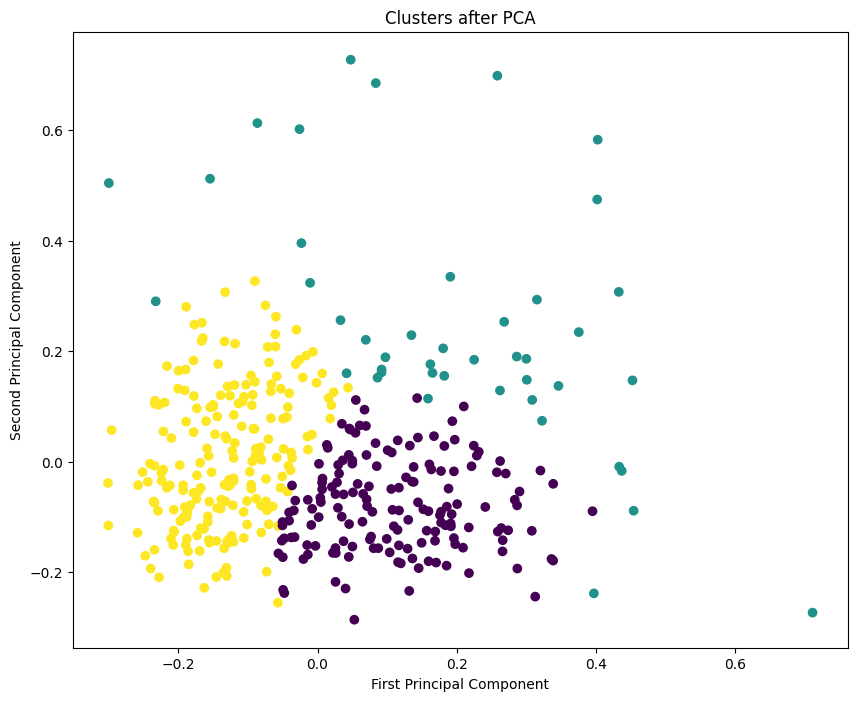

In [17]:
cluster_GMM(df_reduced, 3)

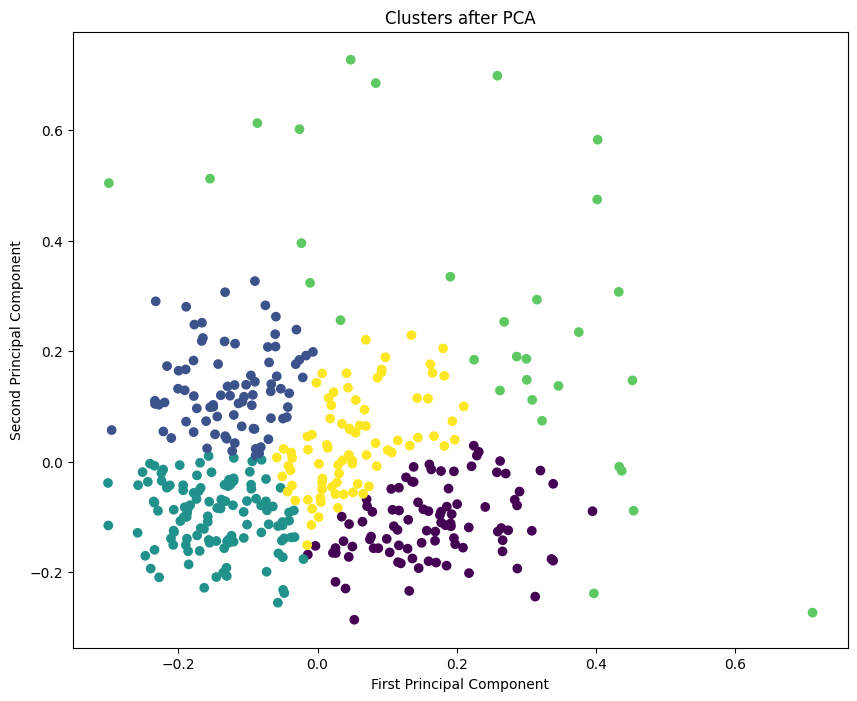

In [18]:
cluster_GMM(df_reduced, 5)

Okay, so we can see that the 4 cluster model breaks the larger cluster on the upper left into 2 smaller clusters. However, both metrics seem to mostly classify the outer datapoints into the same cluster. Because the differences here are small, and the AIC score for 3 clusters is only slightly larger than that of the 4 cluster model, we will go with the 3 cluster model.

# Discussion

## Clustering Analysis

Let's explore the meanings of some of the clusters we have identified above. We will look at similarities between the stocks in each cluster and see if we can identify any patterns.

In [19]:
df_normalized.head()

,Symbol,Sectors,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield,3 clusters,5 clusters
0,MSFT,Technology,0.115016,1.000000,0.217684,0.548600,0.078075,2,2
1,AAPL,Technology,0.047047,0.877809,0.136364,0.499054,0.058824,2,2
2,NVDA,Technology,0.248597,0.717783,0.752602,0.539670,0.001070,1,3
3,META,Communication Services,0.140613,0.416624,0.541015,0.493398,0.041711,1,1
4,LLY,Healthcare,0.224613,0.245528,0.366207,0.618555,0.071658,2,1


In [20]:
cluster_summary = df_normalized.groupby('3 clusters')[features].mean()

cluster_summary

,Current Price,Market Cap,Volatility,P/E Ratio,Dividend Yield
3 clusters,,,,,
0,0.028798,0.020618,0.210040,0.463786,0.373483
1,0.026636,0.033639,0.544925,0.441593,0.418279
2,0.066814,0.032531,0.267963,0.478517,0.124942


Cluster 0 has the second highest current price of around 0.029. It has the lowest market cap out of the clusters, having around 0.01 smaller than other clusters. It also has the lowest volatility while maintaining a second in P/E ratio and dividend yield. Considering low presence in market cap and fairly high P/E ratio and dividend yield, this cluster might represent more traditional, smaller, possibly value-oriented companies with stable dividend payouts.


Cluster 1 shows the lowest current price, yet highest market cap and dividend yield. Cluster 1 also has the highest volatility by far and the lowest P/E ratio as well. The volatility especially for cluster 1 shows drastic difference compared to others, with mid 0.5, whereas the other two clusters are in the 0.2s. These metrics suggest that stocks in cluster 1 are very high risk, high return stocks. Considering these characteristics, cluster 1 could represent growth-oriented companies, potentially in technology or high-growth sectors.


Lastly, Cluster 2 is characterized by the highest current price (by around 0.4 compared to others) and second highest market cap. It also holds second in volatility, but much closer to cluster 0 than cluster 1. In dividend yield, it has the lowest dividend yield by far, 0.25 lower than cluster 0 and 0.29 lower than cluster 1. Its extremely high current price and extremely low dividend yield might suggest that cluster 2 is the 'majority stocks', that are 'standard' and it is focused as much in the market.


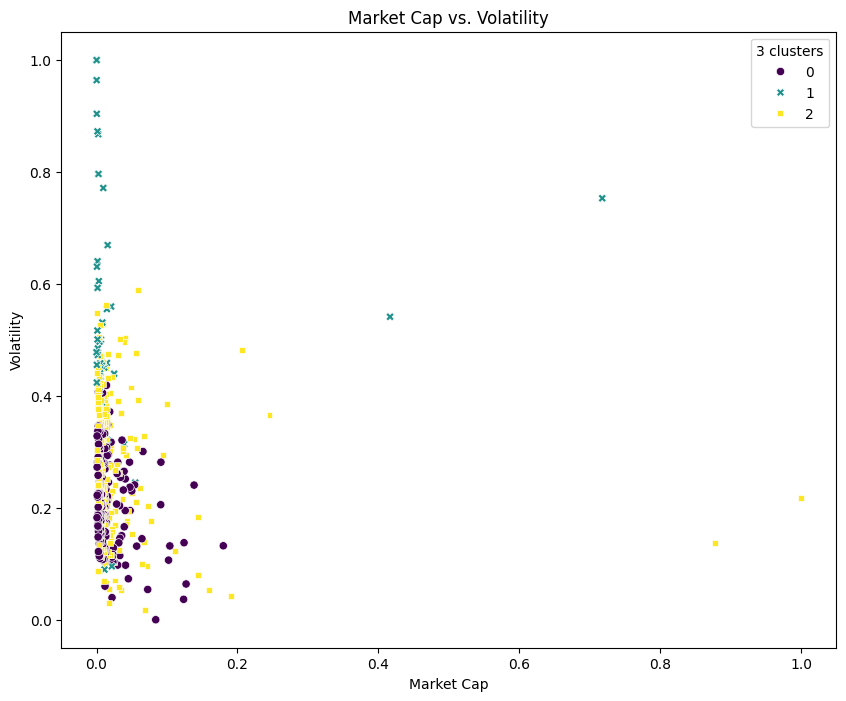

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Market Cap', y='Volatility', hue='3 clusters', style='3 clusters', data=df_normalized, palette='viridis')
plt.title('Market Cap vs. Volatility')
plt.show()

The plotting of Market Cap vs. Volatility of 3 clusters shows us that in terms of volatility and market cap, cluster 2 and cluster 0 are very similar to each other. We saw that the average volatility of the clusters are very similar. However, there was a substantial difference in the average market cap between those two, unlike the majority of points of two clusters suggested in the plot. We can see the two outliers of cluster 2 that are extremely close to 1.0 in the x-axis direction, affecting the average market cap of cluster 2. For cluster 1, we can see that the majority of stocks in cluster 1 have very low market cap but very high volatility. From this we can infer that cluster 1 could be a stock of companies that are relatively new to the market.


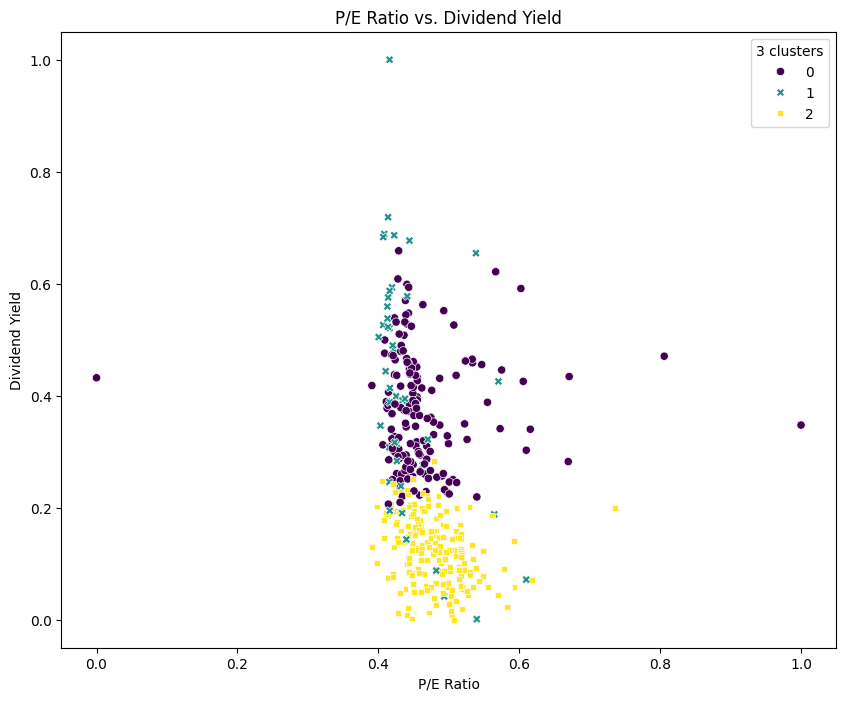

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='P/E Ratio', y='Dividend Yield', hue='3 clusters', style='3 clusters', data=df_normalized, palette='viridis')
plt.title('P/E Ratio vs. Dividend Yield')
plt.show()

Looking at the P/E ratio vs. dividend yield plot, we can see that the P/E ratio of all three clusters are relatively the same. In terms of this plot, cluster 0 and cluster 1 are extremely similar to each other. However, this doesn't indicate anything significant, or further analysis is needed to infer a relevant relationship between the two.

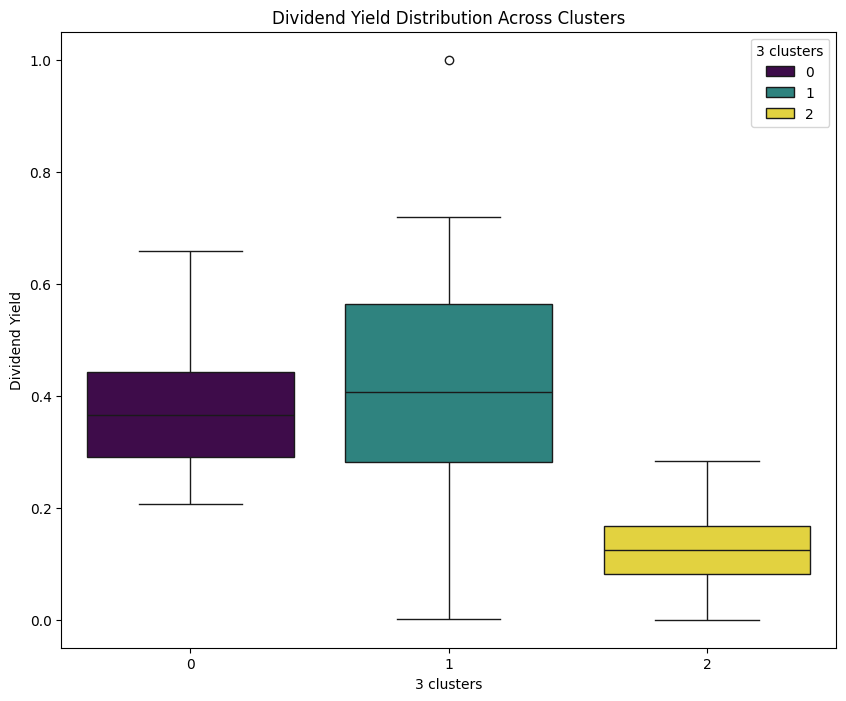

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='3 clusters', y='Dividend Yield', data=df_normalized, palette='viridis', hue='3 clusters')
plt.title('Dividend Yield Distribution Across Clusters')
plt.show()

The boxplot above indicates that on average, cluster 0 and 2 have similar divdend yield with 0.4. Both clusters has similar max around 0.7. The min of cluster 2 is much lower than cluster 0. For cluster 1, the mean divedend yield is much lower than two other clusters. Hence, maybe we can look at the plot of Volatility vs. Dividend Yield can provide with us a better separation among the clusters in specific columns of data. 

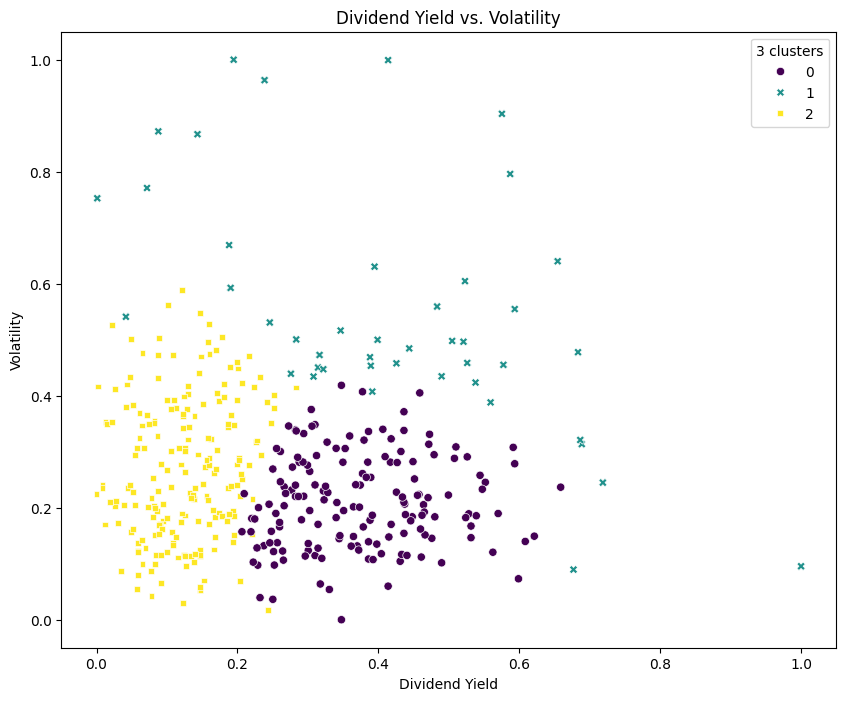

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dividend Yield', y='Volatility', hue='3 clusters', style='3 clusters', data=df_normalized, palette='viridis')
plt.title('Dividend Yield vs. Volatility')
plt.show()

Interestingly enough, the Dividend Yield vs. Volitatility plot is identical to the clustering plot Gaussian Mixture Model from above. From the plot above, we can see that volatility shows relations to the second principal component where as the divedend yield has relation to the first principal component. However, we are not sure how much significance this holds since it might just mean that volatility and dividend yield are the greatest source of variance. 

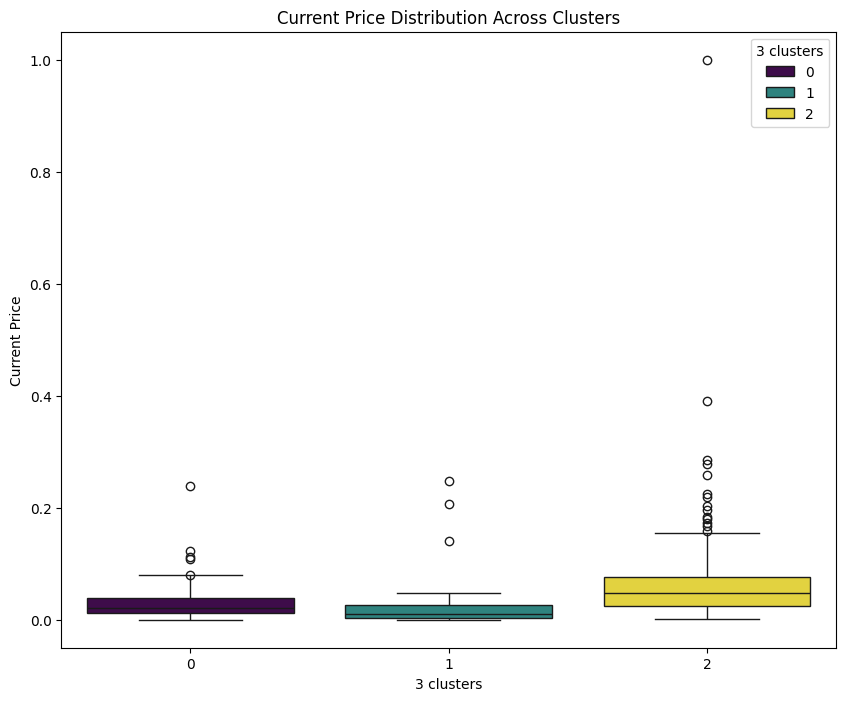

In [60]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='3 clusters', y='Current Price', data=df_normalized, palette='viridis', hue='3 clusters')
plt.title('Current Price Distribution Across Clusters')
plt.show()

It seems like there is little variability between the 3 clusters and current price. That being said, cluster 2 seems to have most of the largest current prices, while cluster 1 has the lowest current prices.

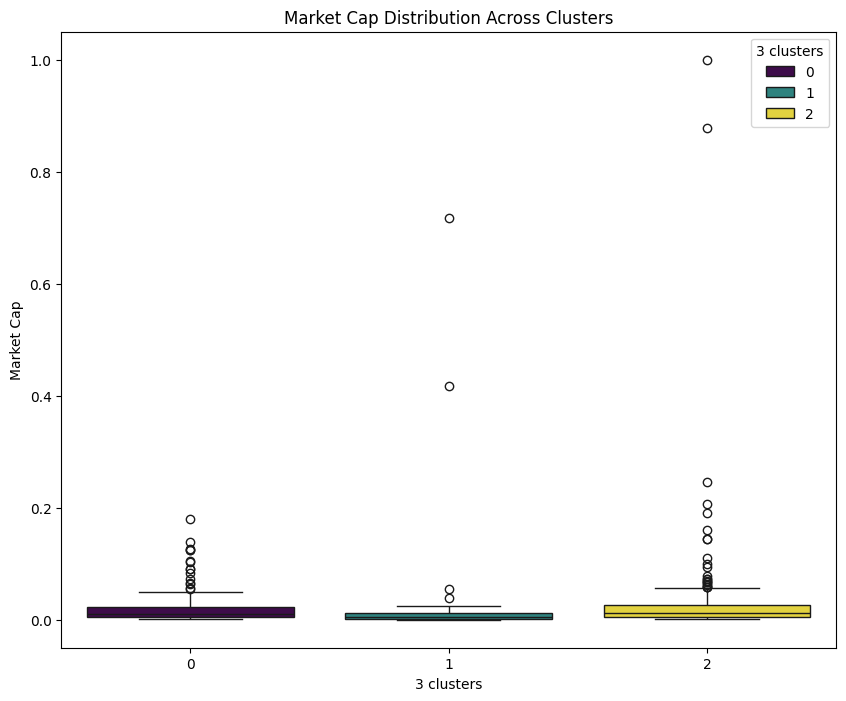

In [61]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='3 clusters', y='Market Cap', data=df_normalized, palette='viridis', hue='3 clusters')
plt.title('Market Cap Distribution Across Clusters')
plt.show()

# Results

We can see that our clustering has provided us with three clusters that have distinct characteristics. We can see that the clusters have different characteristics in terms of market cap, volatility, P/E ratio, and dividend yield. This is a good sign that our clustering has been successful in identifying different groups of stocks.

However, we can also see that the clustering is not perfect. In many metrics, we only see minor differences between the clusters. This suggests that the clusters are not perfectly distinct from each other. This is not necessarily a bad thing, as it is possible that the stocks in the S&P 500 are not perfectly separable into distinct groups. However, it is also possible that our clustering algorithm has not done a perfect job of identifying the clusters.

### 1. How can this be used?

Investors and hedge fund managers are constantly looking for opportunities to diversify their portfolios and maximize their returns. By using a clustring algorithm, we have shown that it is possible to find certain characteristics, and indeed, it may be possible in inflict a bias upon your model, grouping stocks based on certain characteristics. This can be used to identify groups of stocks that align more with an investor's investment goals.

For example, many investors look for dividend stocks that provide a steady income. However, it's hard to find a balance between dividend yield, volatility, and market cap. By using a clustering algorithm, we can group stocks based on these characteristics, and then identify the stocks that have the best balance between these characteristics. We can then add stocks from different clusters to our fund, in order to diversify our portfolio.

### 2. What are the implications of this?

The fair market hypothesis states that it is impossible to beat the market, as all information is already priced into the stocks. However, if we can use a clustering algorithm to identify stocks that have certain characteristics, we can still gain value from the market. This is because we are not trying to beat the market, but rather, we are trying to identify stocks that have certain characteristics. This is a different approach to investing, and it is possible that it could be successful.

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

Introducing more data could alter the nature of the problem, requiring careful consideration of data quality and relevance. If additional data is introduced, it might provide a more comprehensive representation of the underlying patterns in stock returns and volatility. Low-quality or irrelevant data could introduce noise and bias into the analysis, leading to inaccurate results. 

Exploring a broader range of hyperparameters and conducting tuning might enhance clustering model performance. Additionally, careful selection and engineering of features are essential for capturing underlying patterns effectively. 

Finally, incorporating domain knowledge about the stock market and financial indicators could further enhance the analysis. By understanding the underlying economic factors that influence stock returns and volatility, we can better refine feature selection and interpret clustering results.


The current approach places a strong emphasis on key steps such as data normalization, which is crucial for preparing data for machine learning tasks. However, the addition of more data has the potential to significantly alter the nature of the problem, necessitating a thorough evaluation of both data quality and relevance. Exploring a broader range of hyperparameters and conducting comprehensive tuning exercises could potentially enhance the performance of clustering models. Additionally, careful consideration must be given to feature selection and engineering, as these steps play a vital role in capturing the underlying patterns present in the dataset. It is important to recognize that the effectiveness of the analysis is contingent upon the quality and relevance of the selected features. Rigorous evaluation using appropriate metrics is essential to gauge the performance of the clustering model accurately. Integration of domain knowledge pertaining to the stock market and financial indicators can provide valuable insights and context to the analysis. Furthermore, visualizations such as scatter plots and dendrograms can aid in the interpretation and understanding of clustering results. Despite the outlined steps being reasonable and methodical, there is always room for refinement and improvement in the process. Continuous iteration and experimentation are essential to iteratively enhance the performance and robustness of the clustering model. Moreover, it is imperative to maintain a critical mindset and be receptive to alternative approaches and methodologies. Collaboration and knowledge-sharing within the team can foster innovation and facilitate the discovery of novel insights. Ultimately, the goal is to develop a robust and reliable clustering model that can effectively uncover underlying patterns and relationships within the dataset.








### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
